# **Series de Fourier**

In [1]:
import numpy as np
import matplotlib.pylab as plt

from scipy import signal as sp
# Importamos todo el modulo sympy
from sympy import *
# Importamos las variables simbolicas 'n' y 't'
from sympy.abc import n, t

Text(0.5, 0, 'time(t)')

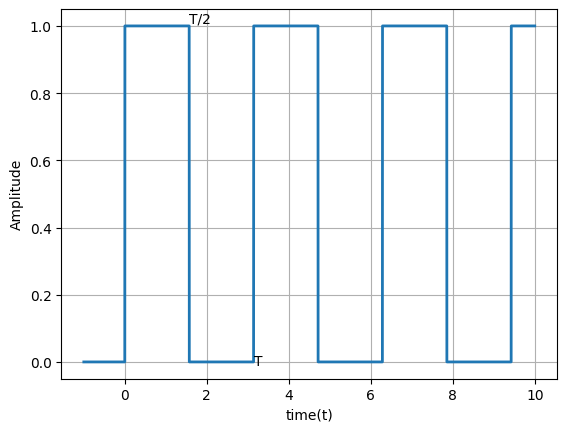

In [2]:
# Periodo
T = pi
# Frecuencia angular
w = (2*pi)/T

amplitude = 1
time = np.arange(-1, 10, 0.001)
squareWaveFunction = (sp.square(2*time) * amplitude/2.0) + amplitude/2.0

# Graficamos la onda cuadrada
plt.plot(time, squareWaveFunction, lw=2)
plt.grid()
plt.annotate('T', xy = (np.pi, 0), xytext = (np.pi, -0.01))
plt.annotate('T/2', xy = (np.pi / 2.0, 0), xytext = (np.pi / 2.0, 1.01))
plt.ylabel('Amplitude')
plt.xlabel('time(t)')

### La función que representa la señal cuadrada, esta definida de la siguiente manera:

<center><image src="Picture3.PNG" alt="Functions that are defined piecewise"></center>

#### La formula de los coeficientes esta dada por:

<center><image src="Picture5.PNG" alt="Functions that are defined piecewise"></center>

* **Calculamos los coeficientes usando sympy.**

In [3]:
# Integramos la funcion (2/T) cuya variable es 't'
# y limites de integracion son 0 y pi/2
ao = 2/T*integrate(1, (t, 0, T/2))

print("a0 = ")
pprint(ao)

# Integramos la funcion (2/pi)*cos(2nt) 
# Su variable es 't' y sus limites de integracion son 0 y pi/2
an = (2/T)*integrate(cos(n*w*t), (t, 0, T/2))

print("an = ")
pprint(an)

# Integramos la funcion (2/pi*sin(2nt)
# Su variable es 't' y sus limites de integracion son 0 y pi/2. 
bn = (2/T)*integrate(sin(n*w*t), (t, 0, T/2))

print("bn = ")
pprint(bn)

a0 = 
1
an = 
  ⎛⎧sin(π⋅n)                            ⎞
  ⎜⎪────────  for n > -∞ ∧ n < ∞ ∧ n ≠ 0⎟
  ⎜⎪  2⋅n                               ⎟
2⋅⎜⎨                                    ⎟
  ⎜⎪   π                                ⎟
  ⎜⎪   ─              otherwise         ⎟
  ⎝⎩   2                                ⎠
─────────────────────────────────────────
                    π                    
bn = 
  ⎛⎧  cos(π⋅n)    1                             ⎞
  ⎜⎪- ──────── + ───  for n > -∞ ∧ n < ∞ ∧ n ≠ 0⎟
2⋅⎜⎨    2⋅n      2⋅n                            ⎟
  ⎜⎪                                            ⎟
  ⎝⎩       0                  otherwise         ⎠
─────────────────────────────────────────────────
                        π                        


* **Calculamos la serie basada en la cantidad de coeficientes.**

In [4]:
print( "f(x) = ")

nCoeficientes = 11
serie = (ao/2)
for i in range(1, nCoeficientes + 1):
    serie = serie + (an*cos(n*w*t)).subs(n, i)
for j in range(1, nCoeficientes + 1):
    serie = serie + (bn*sin(n*w*t)).subs(n, j)

pprint(serie)

f(x) = 
2⋅sin(2⋅t)   2⋅sin(6⋅t)   2⋅sin(10⋅t)   2⋅sin(14⋅t)   2⋅sin(18⋅t)   2⋅sin(22⋅t
────────── + ────────── + ─────────── + ─────────── + ─────────── + ──────────
    π           3⋅π           5⋅π           7⋅π           9⋅π           11⋅π  

)   1
─ + ─
    2


1. El termino $\frac{1}{2}$ es el resultado de $\frac{a_n}{2}$. Este termino es conocido como termino independiente o offset de la señal. 

2. La serie solo contiene términos en función de senos y ningún coseno. Eso quiere decir que el coeficiente $a_n$ es igual a cero para cualquier **n**. Sabemos que:

\begin{equation*} 
    a_n = \frac{sin(n * \pi)}{n * \pi} 
\end{equation*} 

* Si nos fijamos, sin(n*π) va a ser igual a cero para cualquier valor de **n** (donde **n** pertenece a los números enteros: 1,2,3,4,5,6,7,8...)

3. A pesar de que usamos 11 valores enteros para **n** (1,2,3,4,5,6,7,8,9,10,11). Solo obtuvimos 6 términos sin contar el offset (ya que este se debe a $a_0$ y no a $a_n$ o $b_n$). Esto se debe a que $b_n$ es igual a cero cuando **n** es un numero par.

\begin{equation*} 
    b_n = \frac{1 - cos(n * \pi)}{n * \pi}
\end{equation*} 

* Cuando **n** toma valores pares (2,4,6,8,10), $b_n$ es igual a cero. Por lo tanto, $b_n$ solo toma 6 valores que corresponden a los 6 números impares que le asignamos a **n**.



* **Graficamos cada serie de forma individual contra el tiempo**

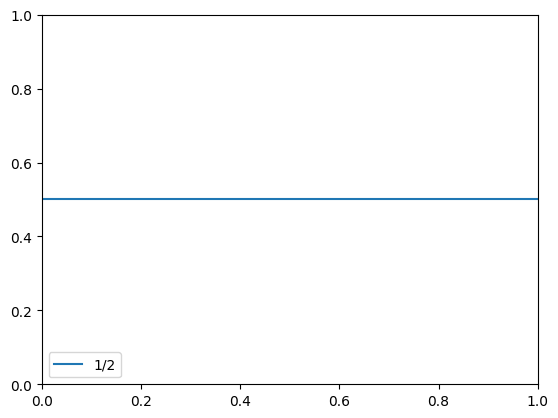

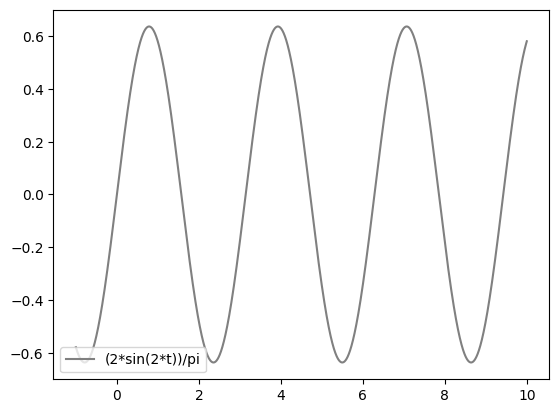

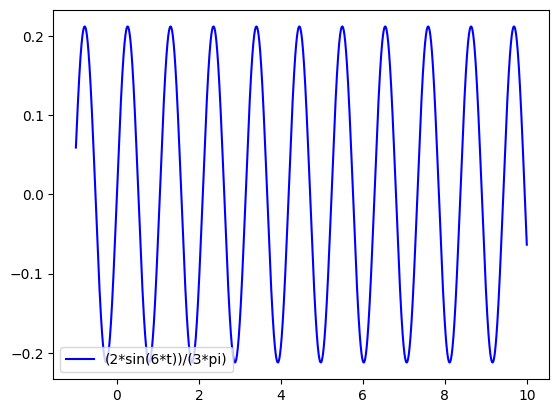

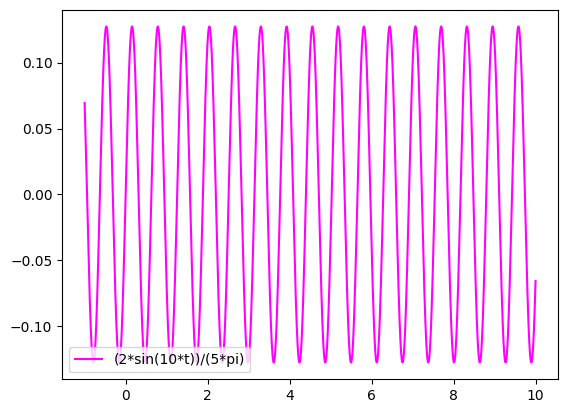

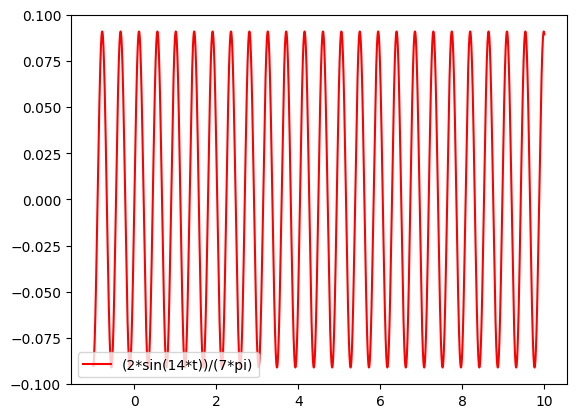

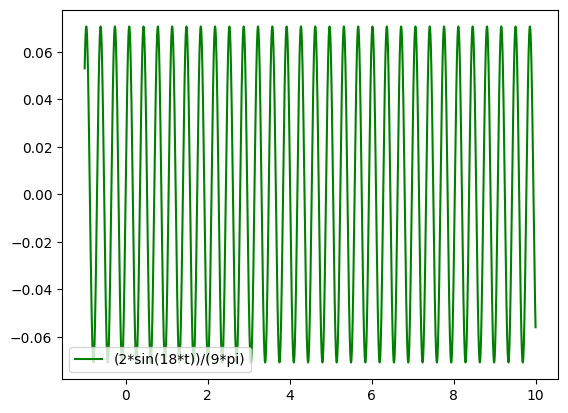

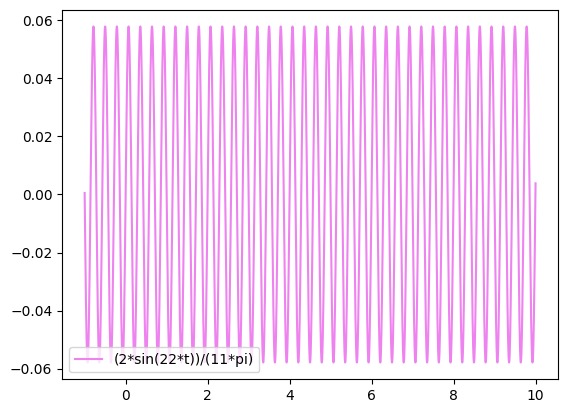

In [5]:
plt.figure()
plt.axhline(y = 0.5, label = '1/2')
plt.legend(loc = "lower left")

plt.figure()
serie1 = (2 * np.sin(2*time)) / np.pi
plt.plot(time, serie1, 'grey', label = '(2*sin(2*t))/pi')
plt.legend(loc = "lower left")

plt.figure()
serie2 = (2 * np.sin(6*time)) / (3*np.pi)
plt.plot(time, serie2, 'blue', label = '(2*sin(6*t))/(3*pi)')
plt.legend(loc = "lower left")

plt.figure()
serie3 = (2 * np.sin(10*time)) / (5*np.pi)
plt.plot(time, serie3, 'magenta', label = '(2*sin(10*t))/(5*pi)')
plt.legend(loc = "lower left")

plt.figure()
serie4 = (2 * np.sin(14*time)) / (7*np.pi)
plt.plot(time, serie4, 'red', label = '(2*sin(14*t))/(7*pi)')
plt.legend(loc = "lower left")

plt.figure()
serie5= (2 * np.sin(18*time)) / (9*np.pi)
plt.plot(time, serie5, 'green', label = '(2*sin(18*t))/(9*pi)')
plt.legend(loc = "lower left")

plt.figure()
serie6 = (2 * np.sin(22*time)) / (11*np.pi)
plt.plot(time, serie6, 'violet', label = '(2*sin(22*t))/(11*pi)')
plt.legend(loc = "lower left")

* **Graficamos la serie de fourier**

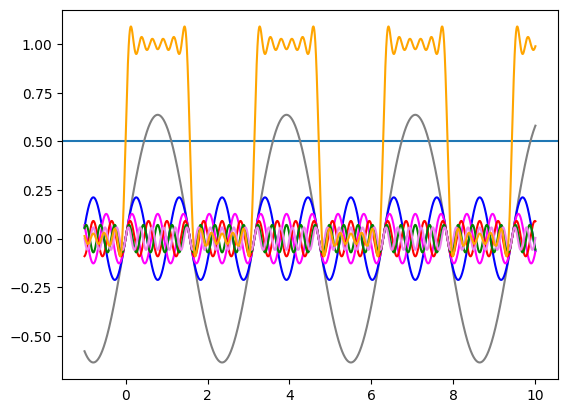

In [6]:
plt.axhline(y = 0.5, label = '1/2')

serie1 = (2 * np.sin(2*time)) / np.pi
plt.plot(time, serie1, 'grey', label = '(2*sin(2*t))/pi')

serie2 = (2 * np.sin(6*time)) / (3*np.pi)
plt.plot(time, serie2, 'blue', label = '(2*sin(6*t))/(3*pi)')

serie3 = (2 * np.sin(10*time)) / (5*np.pi)
plt.plot(time, serie3, 'magenta', label = '(2*sin(10*t))/(5*pi)')

serie4 = (2 * np.sin(14*time)) / (7*np.pi)
plt.plot(time, serie4, 'red', label = '(2*sin(14*t))/(7*pi)')

serie5= (2 * np.sin(18*time)) / (9*np.pi)
plt.plot(time, serie5, 'green', label = '(2*sin(18*t))/(9*pi)')

serie6 = (2 * np.sin(22*time)) / (11*np.pi)
plt.plot(time, serie6, 'violet', label = '(2*sin(22*t))/(11*pi)')

serieFourier = 1/2 + serie1 + serie2 + serie3 + serie4 + serie5 + serie6 
plt.plot(time, serieFourier, 'orange')

* **Graficamos la serie de fourier y la función de onda cuadrada**

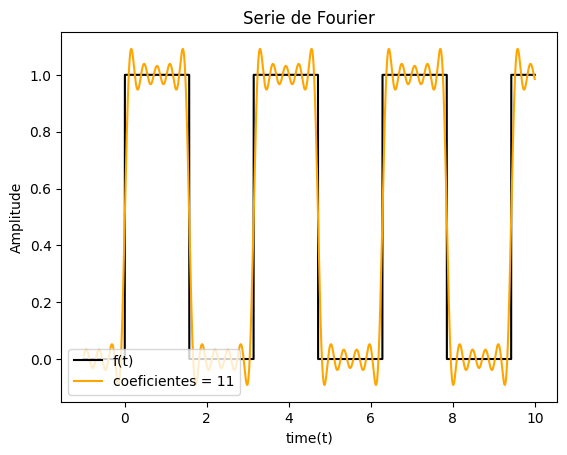

In [14]:
plt.plot(time, squareWaveFunction, 'black', label = 'f(t)')
etiqueta = 'coeficientes = '+ str(nCoeficientes)
serieFourier = 1/2  + serie1 + serie2 + serie3 + serie4 + serie5 + serie6  
plt.plot(time, serieFourier, 'orange', label = etiqueta)
plt.title('Serie de Fourier')
plt.xlabel('time(t)')
plt.ylabel('Amplitude')
plt.legend(loc = "lower left")

###### Fuente: http://raerpo2.blogspot.com/2011/01/series-de-fourier-con-python.html